# Employee Retention

by Subhankar Halder

## Objective

In this project, we predict when employees are going to quit by investigating employee churn data. [Data Masked](https://datamasked.com) is the source of this dataset. 

## Import Libraries

We import libraries into Python that will supply us with tools to sort, organize, visualize and analuze data. 

In [16]:
# Import numpy and set alias as np
import numpy as np

# Import pandas and set alias as pd
import pandas as pd

# Import pyplot and set alias as plt
from matplotlib import pyplot as plt

# Import seaborn and set alias as sns
import seaborn as sns

# Import datetime 
from datetime import datetime



## Load Data

We load the csv data into a pandas dataframe. We print out the first few rows of the data. 

In [25]:
# Load data into dataframe
df = pd.read_csv('employee_retention.csv', parse_dates=['join_date', 'quit_date'])

# Use head command to print out first few rows
print(df.head(10))

   employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   
5     509529.0           4      data_science         14  165000.0 2012-01-30   
6      88600.0           4  customer_service         21  107000.0 2013-10-21   
7     716309.0           2  customer_service          4   30000.0 2014-03-05   
8     172999.0           9          engineer          7  160000.0 2012-12-10   
9     504159.0           1             sales          7  104000.0 2012-06-12   

   quit_date  
0 2015-10-30  
1 2014-04-04  
2        NaT  
3 2013-06-07  
4 2014-08-22  
5 2013-08-30  
6        NaT  

## Data Exploration

We explore the data to look for relationships and errors. 

In [26]:
# Print information about the dataframe
df.info()

# Null Information
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [27]:
# Print dataframe statistics

df.describe()



,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [28]:
# Min of Join Date
df['join_date'].min()


Timestamp('2011-01-24 00:00:00')

## Observation

We note that the data is for employees across several companies and departments. We also find "NA" written for various quit dates. For these NA observations, we assume that the employees haven't quit the company. 

## Employee Headcount Analysis

Since our data includes employees from different companies, it'll be useful for us to determine how many employees are retained across companies throughtout a time period. For each company, we assume that the headcount starts from zero on 23rd Jan 2011. We further assume that the end of the period is 13th December 2015.



In [29]:
# Define a fixed frequency DateTime index and sort the company_id column
uq_date = pd.date_range(start='2011-01-24', end='2015-12-13')
uq_company = sorted(df['company_id'].unique())

#Define columns that would come up in the final table
date = []
company = []
count = []



In [30]:
# Loop through date and company id
for day in uq_date:
    for index in uq_company:
        join = len(df[(df['join_date'] <= day) & (df['company_id'] == index)])
        quit = len(df[(df['quit_date'] <= day) & (df['company_id'] == index)])
        date.append(day)
        company.append(index)
        count.append(join - quit)


In [31]:
# Create a dataframe for date, employee_headcount, company_id
headcount_data = pd.DataFrame({'date': date, 'company_id': company, 'employee_headcount': count}, 
                     columns=['date', 'company_id', 'employee_headcount'])

# Print a few rows of the newly formed dataframe for company 1
print(headcount_data.query("company_id == 1").head(20))


          date  company_id  employee_headcount
0   2011-01-24           1                  25
12  2011-01-25           1                  27
24  2011-01-26           1                  29
36  2011-01-27           1                  29
48  2011-01-28           1                  29
60  2011-01-29           1                  29
72  2011-01-30           1                  29
84  2011-01-31           1                  59
96  2011-02-01           1                  66
108 2011-02-02           1                  67
120 2011-02-03           1                  67
132 2011-02-04           1                  67
144 2011-02-05           1                  67
156 2011-02-06           1                  67
168 2011-02-07           1                  99
180 2011-02-08           1                 102
192 2011-02-09           1                 104
204 2011-02-10           1                 104
216 2011-02-11           1                 104
228 2011-02-12           1                 104


In [32]:
# Print a few rows of the dataframe for company 2

print(headcount_data.query("company_id == 2").head(20))

          date  company_id  employee_headcount
1   2011-01-24           2                  17
13  2011-01-25           2                  19
25  2011-01-26           2                  19
37  2011-01-27           2                  19
49  2011-01-28           2                  19
61  2011-01-29           2                  19
73  2011-01-30           2                  19
85  2011-01-31           2                  31
97  2011-02-01           2                  33
109 2011-02-02           2                  35
121 2011-02-03           2                  36
133 2011-02-04           2                  36
145 2011-02-05           2                  36
157 2011-02-06           2                  36
169 2011-02-07           2                  55
181 2011-02-08           2                  57
193 2011-02-09           2                  58
205 2011-02-10           2                  58
217 2011-02-11           2                  58
229 2011-02-12           2                  58


## Observation

We observe that company headcount increases as the date increases. This may be due to either the company hiring more employees or employees quitting less as we increase the date. We explore this idea further. 

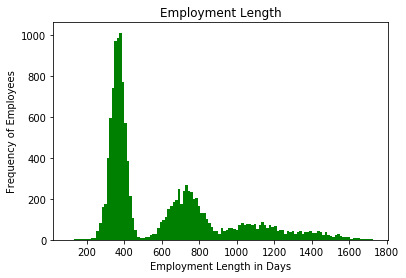

In [34]:
# We calculate the employee length
df['employment_length'] = (df['quit_date'] - df['join_date']).astype('timedelta64[D]')
  
#Plot employment length in days
plt.hist(df['employment_length'].dropna(), bins = 120, color = 'green')
plt.xlabel('Employment Length in Days')
plt.ylabel('Frequency of Employees')
plt.title('Employment Length')
plt.show()

## Conclusions

We note that employees quit their companies at the end of their work anniversaries. Further, employees quit in higher numbers around their first work anniversary than later work anniversaries. 

For future research, we can investigate the data further to see which variable of the employee (salary/department/seniority) is a major factor in the employee quitting a company.  

